# PG-Culturomics
Very slow, experimental... but we can reproduce some of the culturomics plots!

In [1]:
import pandas as pd
import numpy as np
from __future__ import division

In [105]:
meta = pd.read_csv("../metadata/metadata.csv")
meta["year"] = (meta.authoryearofbirth.astype(float)+meta.authoryearofdeath.astype(float))/2
meta = meta.loc[~meta.isnull()["year"]]
meta = meta.set_index("id")
meta = meta.loc[meta.language=="['en']"]

In [106]:
meta.shape

(30786, 9)

In [110]:
A=!ls ../data/counts/
counted = [x.split("_")[0] for x in A]
mybooks = np.intersect1d(meta.index,counted)

In [111]:
len(mybooks)

2908

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

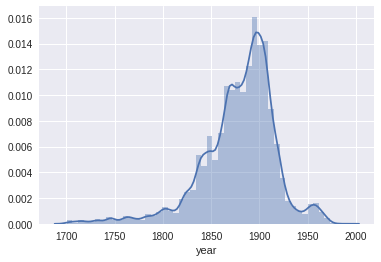

In [113]:
sns.distplot(meta.loc[meta.year>1700].year)

In [165]:
Bdata = []
for PGnum in mybooks:
    b = pd.read_table("../data/counts/%s_counts.txt"%PGnum,names=["word","counts"])
    L = b.counts.sum()
#    b = b.loc[b.counts>1]
    for i in b.index:
        Bdata.append([
            b.loc[i,"word"],
            meta.loc[PGnum,"year"],
            b.loc[i,"counts"]/L,
        ])
    

In [166]:
Bdata = pd.DataFrame(np.array(Bdata),columns=["word","year","frequency"])

In [167]:
Bdata["year"] = Bdata.year.astype(float)
Bdata["frequency"] = Bdata.frequency.astype(float)

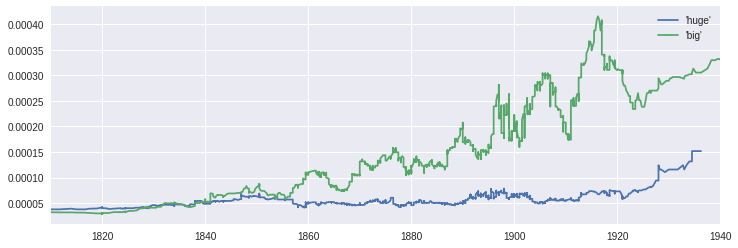

In [260]:
wordlist = ["huge","big"]

fig,ax = plt.subplots(1,1,figsize=(12,4))
ax.set_xlim([1810,1940])
#ax.set_yscale("log")
for w in wordlist:
    Sdata = Bdata.loc[Bdata.word==w].sort_values(by="year").rolling(window=100).median()
    ax.plot(Sdata.year,Sdata.frequency,label="'"+w+"'")
    
#Sdata = Bdata.loc[Bdata.word.apply(lambda x:x in wordlist)].sort_values(by="year").rolling(window=100).median()
#ax.plot(Sdata.year,Sdata.frequency,label=" or ".join(["'"+x+"'" for x in wordlist]))
ax.legend()